In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

## 추론 통계

### 추정

#### 점 추정

In [5]:
# 모집단의 특성을 하나의 값으로 추정
fish = pd.read_csv('data/fish_length.csv')
# fish.head()

# 표본의 평균
mu = sp.mean(fish['length'])
print(mu)

# 표본 평균이 4.187이므로 모 평균도 4.187이라고 추정 : 점 추정

4.187039324504523


In [7]:
# 표본의 분산
sigma = sp.var(fish['length'], ddof = 1)
print(sigma)
# help(sp.var)
# ddof : 제약 조건 값
# fod : 자유도 값

# 분산을 추정할 때는 표본에서 계산량을 통계량을 이용할 수 있는데
# 이 경우에는 불편 분산을 이용
# 자유도를 데이터 개수 -1 로 설정



0.6803017080832622


### 동전을 15번 던졌을 때, 한 쪽 면이 12번 나온 경우 이 동전은 공정한 동전인가?

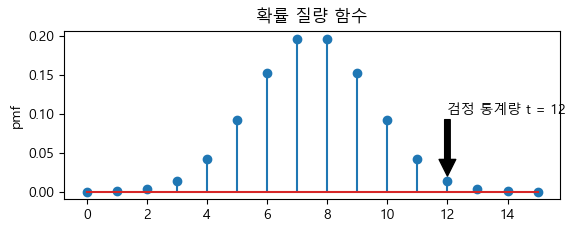

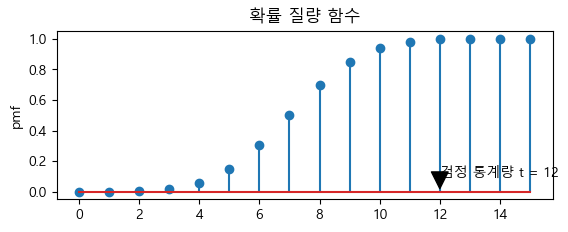

In [14]:
# 동전 던지기는 앞면과 뒷면이 나오는 이항 분포
# 확률(기댓값)은 0.5
# H_0 : mu = 0.5  vs H_1 : mu =! 0.5

N = 15 # 시험 범위
mu = 0.5 # 1이 나올 확률
rv = sp.stats.binom(N, mu)

# 축 설정을 위한 데이터
xx = np.arange(N+1)

# 확률 질량 함수(pmf) - 이산 확률 분포에서 각 사건이 발생할 확률을 계산해주는 함수
# 그래프를 2행 1열로 표시하고 1번 영역에 표시
plt.subplot(211)
# 이산 확률 질량 함수와 누적 밀도 함수는 stem 으로 시각화
plt.stem(xx, rv.pmf(xx))
plt.ylabel('pmf')
plt.title('확률 질량 함수')
plt.annotate('검정 통계량 t = 12', xy=(12, 0.02), xytext=(12, 0.1),
            arrowprops={'facecolor':'black'})

plt.show()

In [ ]:
# 동전 던지기는 앞면과 뒷면이 나오는 이항 분포
# 확률(기댓값)은 0.5
# H_0 : mu = 0.5  vs H_1 : mu =! 0.5

N = 15 # 시험 범위
mu = 0.5 # 1이 나올 확률
rv = sp.stats.binom(N, mu)

# 양측 검정에서 사용할 유의 확률 : 11번까지 나올 수 있는 확률을 1에서 빼면 됩니다.
p = 2 * (1- rv.cdf(12-1))
pirnt(p)

# 우연히 12번 이상 나올 확률은 0.035( 대략 3.5% 정도)
# 유의수준을 5%로 설정하면 이 경우는 귀무 가설이 기각 - 동전은 공정하지 않다.
# 유의 수준을 1%로 설정하면 이 경우는 귀무 가설을 기각할 수 없음 - 공정하다.

In [ ]:
# 동전 던지기는 앞면과 뒷면이 나오는 이항 분포
# 확률(기댓값)은 0.5
# H_0 : mu = 0.5  vs H_1 : mu =! 0.5

N = 15 # 시험 범위
mu = 0.5 # 1이 나올 확률
rv = sp.stats.binom(N, mu)

# 앞면이 11전까지 나올 수 잇는 확률을 구해서 1에서 빼기
p = (1 - rv.cdf(11))
print(p)

# 이제 유의 확률을 계산했으므로 유의 수준을 설정해서 판정
if 0.01 < p : 
    print('유의 확률이 더 높으므로 귀무 가설 채택')
else :
    print('유의 확률이 더 작으므로 대립 가설 채택')


In [15]:
print('아침' ==  ' 공복')

False


## 이항 검정

### 게임에서 내가 이길 확률이 0.3인데 100번 실행했을 때 60번 이상 이기는 것이 가능한지 유의수준 5%로 검정

In [21]:
# 분포 생성
# help(sp.stats.binom)
p = 1 - sp.stats.binom(100, 0.3).cdf(59)
print(p)

if p > 0.05 :
    print("귀무 가설을 기각할 수 없어서 이런 결과가 나올 수도 있습니다.")
else : 
    print('귀무 가설을 기각하고 대립가설 채택, 이런 확률은 희박해요')
    


5.12994979828818e-10
귀무 가설을 기각하고 대립가설 채택, 이런 확률은 희박해요


In [17]:
tips = sns.load_dataset('tips')

#female 이 Female 인 데이터만 추출
female = tips[tips['sex'] == 'Female']
# print(female['sex'.value_counts()])

# 흡연자의 인원 수와 비흡연자의 인원 수를 계산
# 전체 인원 수
fem_cnt = female['sex'].count()
smoke_cnt = female[female['smoker'] == 'Yes'].count()
non_smoke_cnt = female[female['smoker'] == 'No'].count()
print(fem_cnt)
print(smoke_cnt)
print(non_smoke_cnt)


87
total_bill    33
tip           33
sex           33
smoker        33
day           33
time          33
size          33
dtype: int64
total_bill    54
tip           54
sex           54
smoker        54
day           54
time          54
size          54
dtype: int64


In [19]:
p = 1 - (sp.stats.binom(fem_cnt, 0.5).cdf(smoke_cnt[0] - 1))
print(p)
if p > 0.1:
    print("귀무 가설 채택 - 흡연자의 수가 비흡연자의 수보다 많다고 할 수 없다.")
else:
    print("대립 가설 채택 - 흡연자의 수가 비흡연자의 수보다 많다고 할 수 있다.")

0.991086223535132
귀무 가설 채택 - 흡연자의 수가 비흡연자의 수보다 많다고 할 수 없다.


## T 검정

### 단일 표본 T 검정

#### 데이터 개수에 따른 검정 결과

In [22]:
N = 10
mu_0 = 0
np.random.seed(0)

# 샘플 데이터 추출
# X ~ (0, ?)
x = sp.stats.norm(mu_0).rvs(N)

p = sp.stats.ttest_1samp(x, popmean = 0)
print(p) # 유의 확률이 0.0478

# 유의 수준이 5%라면 귀무 가설이 기각


TtestResult(statistic=2.28943967238967, pvalue=0.04781846490857058, df=9)


#### 평균에 대한 검정과 신뢰 구간 구하기

In [34]:
# 아래와 같은 데이터가 있을 때 평균이 50이라고 할 수 있는지 alpha =0.05 검정
data = np.array([52, 49, 45, 53, 49, 50, 55, 43, 44, 48])

# H_0 : mu = 50  vs H_1 : mu != 50

sp.stats.ttest_1samp(data, 50)
# p -value값만 가져오기
sp.stats.ttest_1samp(data, 50)[1]
# r = sp.stats.ttest_1samp(data, 50)
# print(r.pvalue)
# p = r.pvalue

_, p =  sp.stats.ttest_1samp(data, 50)
print(p)

if p > 0.05 : 
    print('귀무 가설을 채택 - 평균은 50이라고 볼 수 있다')
    
else : 
    print('귀무 가설 기각 - 평균은 50이라고 볼 수 없다')


0.36046036813792626
귀무 가설을 채택 - 평균은 50이라고 볼 수 있다


In [31]:
# 신뢰 구간을 구하기 위해서 t 분포를 생성
t_ = sp.stats.t(len(data)-1)

# 0.975 되는 지점의 좌표를 찾기 - 양측 검정이라
p_05 = t_.ppf(0.975)

data_mean = data.mean()
data_std = data.std(ddof = 1)
lp = data_mean - p_05*(data_std / np.sqrt(len(data)))
hp = data_mean + p_05*(data_std / np.sqrt(len(data)))

print(f'유의 수준 0.05 일 때 신뢰 구간 : [{lp}, {hp}]')

유의 수준 0.05 일 때 신뢰 구간 : [45.98262777665255, 51.617372223347445]


#### 데이터를 측정한 결과 : 74, 73, 75, 73, 74, 73, 73, 74, 72
#### 신뢰구간 95% 에서 평균이 73보다 작다고 할 수 있나?

In [39]:
# 데이터를 측정한 결과 :
data = np.array([74, 73, 75, 73, 74, 73, 73, 74, 72])

# 신뢰구간 95% 에서 평균 73보다 작다고 ??
mean = 73 # 가설

_, p = sp.stats.ttest_1samp(data, mean, alternative = 'less')
print(p)

if p > 0.05 :
    print('귀무 가설을 기각할 수 없다. 평균은 73보다 크거나 같다')
    
else : 
    print('귀무가설을 기각할 수 없다. 평균은 73보다 작다')
    


0.9154898984904144
귀무 가설을 기각할 수 없다. 평균은 73보다 크거나 같다
